In [1]:
# 导入所需的package
import seaborn as sns #用于画图
from bs4 import BeautifulSoup #用于爬取arxiv的数据
import re #用于正则表达式，匹配字符串的模式
import requests #用于网络连接，发送网络请求，使用域名获取对应信息
import json #读取数据，我们的数据为json格式的
import pandas as pd #数据处理，数据分析
import matplotlib.pyplot as plt #画图工具

In [2]:
def readArxivFile(path, columns=['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'], count=None):
    '''
    定义读取文件的函数
        path: 文件路径
        columns: 需要选择的列
        count: 读取行数
    '''
    
    data  = []
    with open(path, 'r') as f: 
        for idx, line in enumerate(f): 
            if idx == count:
                break
                
            d = json.loads(line)
            d = {col : d[col] for col in columns}
            data.append(d)

    data = pd.DataFrame(data)
    return data

data = readArxivFile('arxiv-metadata-oai-snapshot.json', 
                     ['id', 'authors', 'categories', 'authors_parsed'],
                    100000)


In [3]:
# 选择类别为cs.CV下面的论文
data2 = data[data['categories'].apply(lambda x: 'cs.CV' in x)]

# 拼接所有作者
all_authors = sum(data2['authors_parsed'], [])

Text(0.5, 0, 'Count')

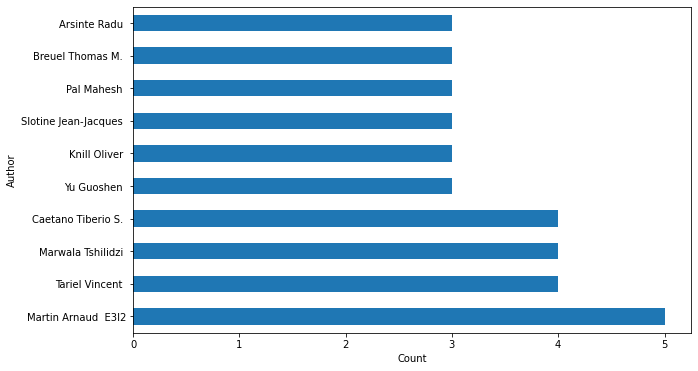

In [4]:
# 拼接所有的作者
authors_names = [' '.join(x) for x in all_authors]
authors_names = pd.DataFrame(authors_names)

# 根据作者频率绘制直方图
plt.figure(figsize=(10, 6))
authors_names[0].value_counts().head(10).plot(kind='barh')

# 修改图配置
names = authors_names[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

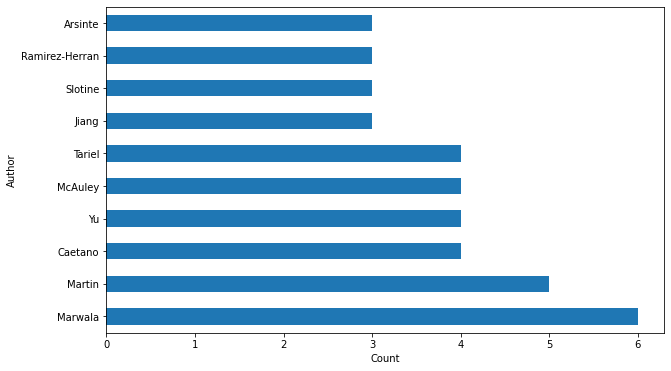

In [5]:
authors_lastnames = [x[0] for x in all_authors]
authors_lastnames = pd.DataFrame(authors_lastnames)

plt.figure(figsize=(10, 6))
authors_lastnames[0].value_counts().head(10).plot(kind='barh')

names = authors_lastnames[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

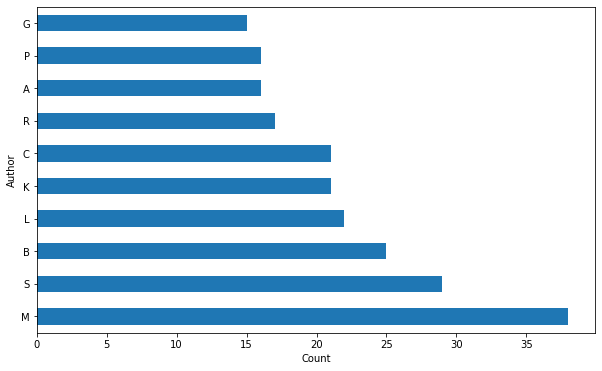

In [6]:
# 统计作者姓的首字符，如Lee第一个字符为L
authors_firstchar = [str(x[0])[0] for x in all_authors]
authors_firstchar = pd.DataFrame(authors_firstchar)

plt.figure(figsize=(10, 6))
authors_firstchar[0].value_counts().head(10).plot(kind='barh')

names = authors_firstchar[0].value_counts().index.values[:10]
_ = plt.yticks(range(0, len(names)), names)
plt.ylabel('Author')
plt.xlabel('Count')